# Projet Titanic - R

In [2]:
urldata <- 'http://w3.mi.parisdescartes.fr/~vperduca/programmation/data/titanic_train.Rdata'
load(url(urldata))

**Question 2 - Explore the data structure**

In [3]:
#Nombre d'observations : 594 
nrow(train)

[1] 594

In [4]:
# Nombre de variables : 12
ncol(train)

[1] 12

Nom des variables : PassengerId (Qualitative), Survived (Qualitative), Pclass (Qualitative), Name (Qualitative), Sex (Qualitative), Age (Quantitative), SibSp (Quantitative), Parch (Quantitative), Ticket (Qualitative), Fare (Quantitative), Cabin (Qualitative), Embarked (Qualitative).


In [5]:
names(train)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

In [6]:
# Il y a 585 valeurs manquantes 
sum(is.na(train))

[1] 585

In [7]:
# Les variables avec le plus de données manquantes ('NA's) sont CABIN (463) et AGE (121).
summary(train)

  PassengerId       Survived          Pclass     
 Min.   :  2.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:214.2   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.5   Median :0.0000   Median :3.000  
 Mean   :442.2   Mean   :0.3721   Mean   :2.323  
 3rd Qu.:663.8   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1   female:201   Min.   : 0.75  
 Abelson, Mr. Samuel                  :  1   male  :393   1st Qu.:21.00  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                Median :28.00  
 Adams, Mr. John                      :  1                Mean   :29.58  
 Aks, Mrs. Sam (Leah Rosen)           :  1                3rd Qu.:38.00  
 Albimona, Mr. Nassef Cassem          :  1                Max.   :71.00  
 (Other)                              :588                NA's   :121    
     Sib

**Question 3 - Description of some data**

- S est une variable qualitative et discrète.
- Sx est une variable qualitative et ordonnée.
- P est une variable qualitative et discrète.
- Age est une variable quantitative et continue.

**Question 4 - Cutting age variable**

In [8]:
# train$Age
cut_age <- cut(train$Age, breaks = 20 * (0:4))
train$cAge = cut_age
head(cut_age)

[1] (40,60] (20,40] (20,40] (20,40] (0,20]  (20,40]
Levels: (0,20] (20,40] (40,60] (60,80]

La variable cA est devenue une variable qualitative.

**Liens entres les variables**

**Question 5**

75.62189 % of female survived.17.55725 % of male survived.

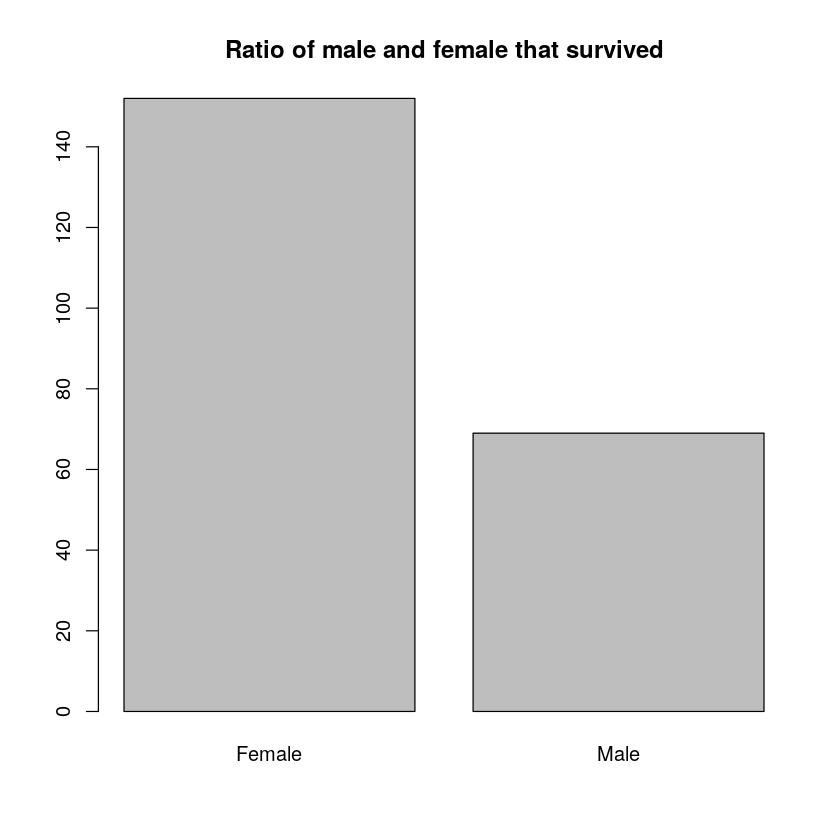

In [9]:
# Lien entre S et Sx :

nb_female_survived <- sum(train$Sex == "female" & train$Survived == 1)
nb_female <- sum(train$Sex == "female")
ratio_female_survived <- (nb_female_survived * 100) / nb_female 

nb_male_survived <- sum(train$Sex == "male" & train$Survived == 1)
nb_male <- sum(train$Sex == "male")
ratio_male_survived <- (nb_male_survived * 100) / nb_male 

cat(ratio_female_survived, "% of female survived.")
cat(ratio_male_survived, "% of male survived.")

sex_table <- c(nb_female_survived, nb_male_survived)
labels <- c("Female","Male")
title <- "Ratio of male and female that survived"
barplot(sex_table, names.arg = labels, main = title)

La chance de survie d'une femme est beaucoup plus élevée que l'homme.

65,46763 % of P1 survived.45,16129 % of P2 survived.22,3565 % of P3 survived.

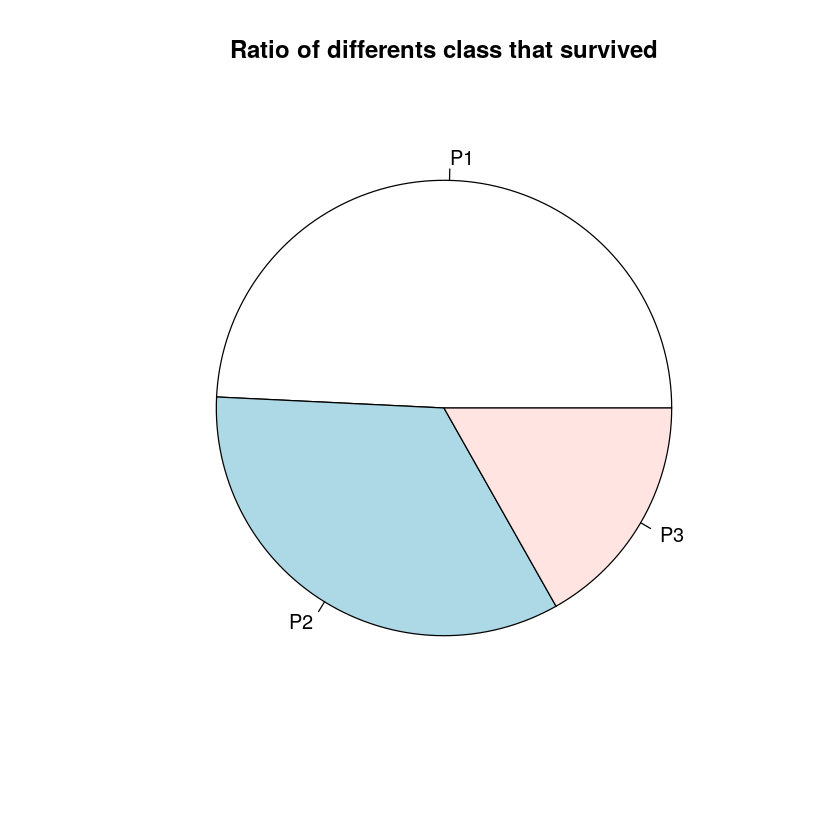

In [10]:
# Lien entre S et P :

nb_p1_survived <- sum(train$Pclass == 1 & train$Survived == 1)
nb_p1 <- sum(train$Pclass == 1)
ratio_p1_survived <- (nb_p1_survived * 100) / nb_p1 

nb_p2_survived <- sum(train$Pclass == 2 & train$Survived == 1)
nb_p2 <- sum(train$Pclass == 2)
ratio_p2_survived <- (nb_p2_survived * 100) / nb_p2

nb_p3_survived <- sum(train$Pclass == 3 & train$Survived == 1)
nb_p3 <- sum(train$Pclass == 3)
ratio_p3_survived <- (nb_p3_survived * 100) / nb_p3 

cat(ratio_p1_survived, "% of P1 survived.")
cat(ratio_p2_survived, "% of P2 survived.")
cat(ratio_p3_survived, "% of P3 survived.")

p_table <- c(ratio_p1_survived, ratio_p2_survived, ratio_p3_survived)
labels <- c("P1","P2", "P3")
title <- "Ratio of differents class that survived"
pie(p_table, labels, main = title)

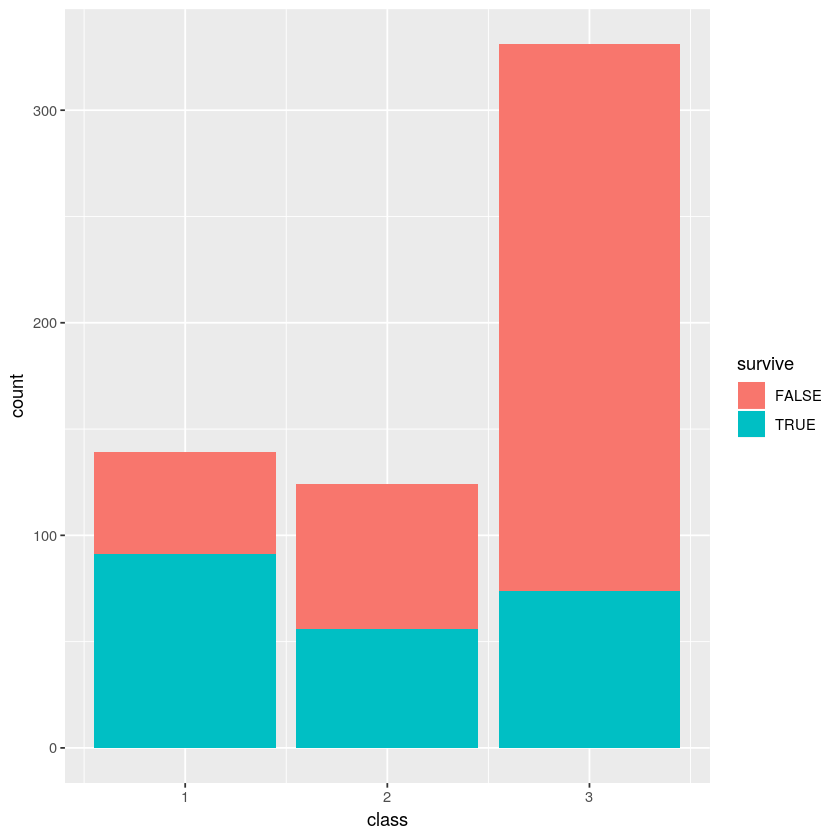

In [11]:
# Nous pouvons également représenter  ceci :

library("ggplot2")
age <- train$Age
class <- train$Pclass
survive <- train$Survived == 1
ggplot(train, aes(x=class, fill=survive)) + geom_bar()


Plus la class est important, plus le taux de chance de survie augmente.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


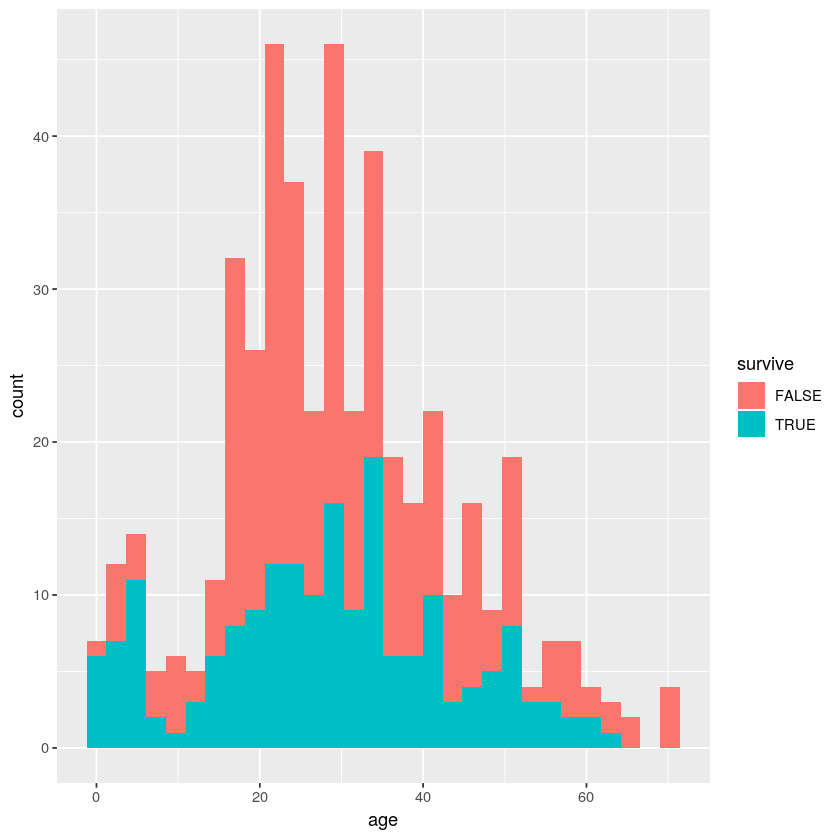

In [12]:
# Lien entre S et A
# Clean the dataframe

train$Cabin <- NULL
train <- na.omit(train)
age <- train$Age
survive <- train$Survived == 1
ggplot(train, aes(x=age, fill=survive )) + geom_histogram()

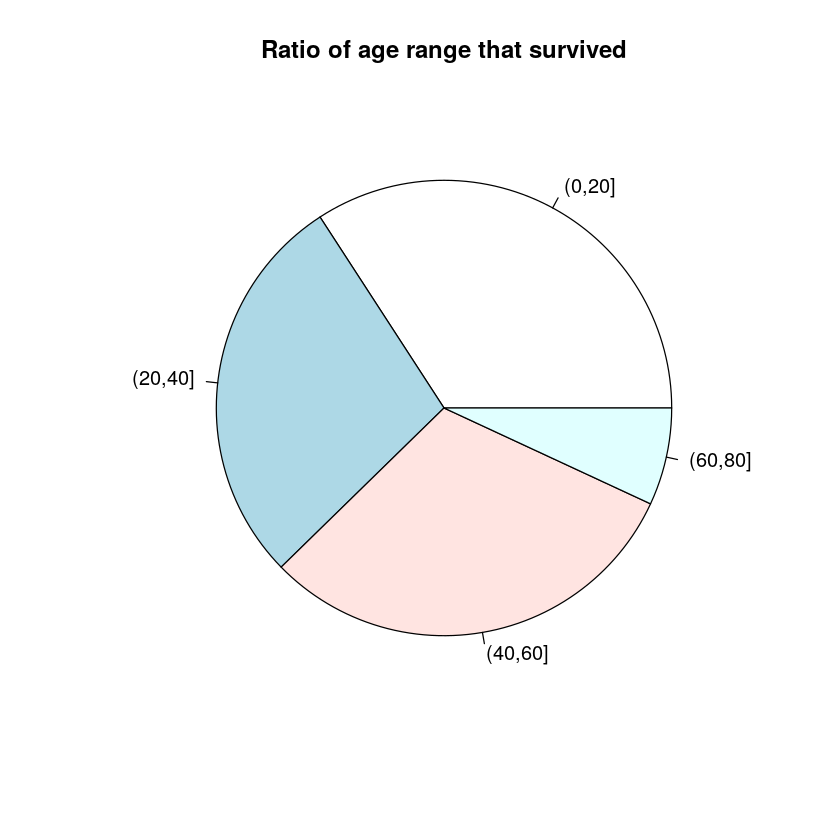

In [13]:
# Lien entre S et cA 
# Clean the dataframe
train$Cabin <- NULL
train = na.omit(train)

nb_cAge1 <- sum(train$cAge == "(0,20]")
nb_cAge1_survived <- sum(train$cAge == "(0,20]" & train$Survived == 1)
nb_cAge2 <- sum(train$cAge == "(20,40]")
nb_cAge2_survived <- sum(train$cAge == "(20,40]" & train$Survived == 1)
nb_cAge3 <- sum(train$cAge == "(40,60]")
nb_cAge3_survived <- sum(train$cAge == "(40,60]" & train$Survived == 1)
nb_cAge4 <- sum(train$cAge == "(60,80]")
nb_cAge4_survived <- sum(train$cAge == "(60,80]" & train$Survived == 1)

ratio_cAge1 <- (nb_cAge1_survived * 100) / nb_cAge1
ratio_cAge2 <- (nb_cAge2_survived * 100) / nb_cAge2
ratio_cAge3 <- (nb_cAge3_survived * 100) / nb_cAge3
ratio_cAge4 <- (nb_cAge4_survived * 100) / nb_cAge4

ratio_list <- c(ratio_cAge1, ratio_cAge2, ratio_cAge3, ratio_cAge4)
labels <- c("(0,20]", "(20,40]", "(40,60]", "(60,80]")
title <- "Ratio of age range that survived"
pie(ratio_list, labels = labels, main = title)

**Question 6**

Une première hypothèse peut être établie quant à l'avantage de survie d'un candidat. En effet, avec les analyses précédentes, on peut estimé que les caractères homme, agée et dernière classe contribuent à faire baisser l'espérence de survie, alors que les caractères femme et première classe contribuent à la faire augmenter.


**Prédiction de la survie**
**Question 7**

In [14]:
#P(S=1|Sx=Female), 
sum(train$Sex == 'female' & train$Survived == 1) / sum(train$Sex == 'female')


#P(S=1|Sx=Male), 
sum(train$Sex == 'male' & train$Survived == 1) / sum(train$Sex == 'male')


#P(S=1|P=1), 
sum(train$Pclass == 1 & train$Survived == 1) / sum(train$Pclass == 1)


#P(S=1|P=2),
sum(train$Pclass == 2 & train$Survived == 1) / sum(train$Pclass == 2)


#P(S=1|P=3), 
sum(train$Pclass == 3 & train$Survived == 1) / sum(train$Pclass == 3)


#P(S=1|cA=(0,20]), 
sum(train$cAge == "(0,20]" & train$Survived == 1) / sum(train$cAge == "(0,20]")


#P(S=1|cA=(20,40]), 
sum(train$cAge == "(20,40]" & train$Survived == 1) / sum(train$cAge == "(20,40]")


#P(S=1|cA=(40,60]), 
sum(train$cAge == "(40,60]" & train$Survived == 1) / sum(train$cAge == "(40,60]")
  

#P(S=1|cA=(60,80]), 
sum(train$cAge == "(60,80]" & train$Survived == 1) / sum(train$cAge == "(60,80]")

[1] 0,755814

[1] 0,18

[1] 0,6923077

[1] 0,4453782

[1] 0,2118644

[1] 0,4491525

[1] 0,3700787

[1] 0,4044944

[1] 0,09090909

**Question 8 - Probability tables**

In [15]:
S_P <- prop.table(table(train$Pclass, train$Survived), margin=2)
rownames(S_P) <- c('1', '2', '3')
colnames(S_P) <- c('0','1')
S_P

S <- prop.table(table(train$Survived))
names(S) <- c('0','1')
S

S_Sx <- prop.table(table(train$Sex, train$Survived), margin=2)
rownames(S_Sx) <- c('female','male')
colnames(S_Sx) <- c('0','1')
S_Sx

S_Ca <- prop.table(table(train$cAge, train$Survived), margin=2)
rownames(S_Ca) <- c('(0,20]','(20,40]', '(40,60]', '(60,80]')
colnames(S_Ca) <- c('0','1')
S_Ca

   
            0         1
  1 0,1250000 0,4402174
  2 0,2291667 0,2880435
  3 0,6458333 0,2717391

        0         1 
0,6101695 0,3898305 

        
                 0         1
  female 0,1458333 0,7065217
  male   0,8541667 0,2934783

         
                    0           1
  (0,20]  0,225694444 0,288043478
  (20,40] 0,555555556 0,510869565
  (40,60] 0,184027778 0,195652174
  (60,80] 0,034722222 0,005434783

**Question 9 - Bayes Classifier**

In [16]:
prob_prediction <- function(Sex, Pclass, cAge)
{
  numerator <- S_Sx[Sex, '1'] * S_P[Pclass, '1'] * S_Ca[cAge, '1'] * S['1']
  denominator <- numerator + (S_Sx[Sex, '0'] * S_P[Pclass, '0'] * S_Ca[cAge, '0'] * S['0'])

  
  return((numerator / denominator) * 100)
}

cat((prob_prediction('female', '1', '(20,40]')), '% de chance de survivre.')

90,92874 % de chance de survivre.

**Evaluation de la performance du classificateur**    
**Question 10 - Load data for test**

In [17]:
urldata <- 'http://w3.mi.parisdescartes.fr/~vperduca/programmation/data/titanic_test.Rdata'
load(url(urldata))

**Question 11 - Produce probability vector**

In [18]:
prob.prediction <- function(test)
{
  V_Sex <- test$Sex
  V_Pclass <- test$Pclass
  V_cAge <- test$cAge
  
  V_prob <- list()
  
  for (i in 1:nrow(test))
  {
    cur_prob <- prob_prediction(V_Sex[i], V_Pclass[i], V_cAge[i])
    V_prob[i] <- cur_prob
  }
  
  return(V_prob)
}

V_prob <- prob.prediction(test)
print(V_prob)

[[1]]
[1] 45,11214

[[2]]
[1] 41,55066

[[3]]
[1] 49,66343

[[4]]
[1] 10,79405

[[5]]
[1] 45,11214

[[6]]
[1] 78,15415

[[7]]
[1] 7,828351

[[8]]
[1] 45,11214

[[9]]
[1] 41,55066

[[10]]
[1] 45,11214

[[11]]
[1] 92,05667

[[12]]
[1] 41,55066

[[13]]
[1] 41,55066

[[14]]
[1] 41,55066

[[15]]
[1] 41,55066

[[16]]
[1] 63,0476

[[17]]
[1] 93,29397

[[18]]
[1] 92,05667

[[19]]
[1] 93,29397

[[20]]
[1] 90,92874

[[21]]
[1] 90,92874

[[22]]
[1] 78,15415

[[23]]
[1] 93,29397

[[24]]
[1] 41,55066

[[25]]
[1] 45,11214

[[26]]
[1] 26,04259

[[27]]
[1] 90,92874

[[28]]
[1] 90,92874

[[29]]
[1] 41,55066

[[30]]
[1] 54,49562

[[31]]
[1] 7,828351

[[32]]
[1] 45,11214

[[33]]
[1] 10,79405

[[34]]
[1] 78,15415

[[35]]
[1] 41,55066

[[36]]
[1] 45,11214

[[37]]
[1] 90,92874

[[38]]
[1] 93,29397

[[39]]
[1] 45,11214

[[40]]
[1] 92,05667

[[41]]
[1] 90,92874

[[42]]
[1] 49,66343

[[43]]
[1] 92,05667

[[44]]
[1] 90,92874

[[45]]
[1] 90,92874

[[46]]
[1] 10,79405

[[47]]
[1] 10,79405

[[48]]
[1] 45,11214

[[

**Question 12 - Maximum a Posteriori Probability**

In [19]:
MAP <- function(prob)
{
  if (prob > 50)
  {
    return(1)
  }
  else
  {
    return(0) 
  }
}

classifier_prediction <- function(test)
{
  V_prob <- prob.prediction(test)
  V_predict <- lapply(V_prob, MAP)
}

V_predict <- classifier_prediction(test)
V_predict

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

[[6]]
[1] 1

[[7]]
[1] 0

[[8]]
[1] 0

[[9]]
[1] 0

[[10]]
[1] 0

[[11]]
[1] 1

[[12]]
[1] 0

[[13]]
[1] 0

[[14]]
[1] 0

[[15]]
[1] 0

[[16]]
[1] 1

[[17]]
[1] 1

[[18]]
[1] 1

[[19]]
[1] 1

[[20]]
[1] 1

[[21]]
[1] 1

[[22]]
[1] 1

[[23]]
[1] 1

[[24]]
[1] 0

[[25]]
[1] 0

[[26]]
[1] 0

[[27]]
[1] 1

[[28]]
[1] 1

[[29]]
[1] 0

[[30]]
[1] 1

[[31]]
[1] 0

[[32]]
[1] 0

[[33]]
[1] 0

[[34]]
[1] 1

[[35]]
[1] 0

[[36]]
[1] 0

[[37]]
[1] 1

[[38]]
[1] 1

[[39]]
[1] 0

[[40]]
[1] 1

[[41]]
[1] 1

[[42]]
[1] 0

[[43]]
[1] 1

[[44]]
[1] 1

[[45]]
[1] 1

[[46]]
[1] 0

[[47]]
[1] 0

[[48]]
[1] 0

[[49]]
[1] 0

[[50]]
[1] 0

[[51]]
[1] 1

[[52]]
[1] 0

[[53]]
[1] 1

[[54]]
[1] 0

[[55]]
[1] 1

[[56]]
[1] 0

[[57]]
[1] 0

[[58]]
[1] 1

[[59]]
[1] 1

[[60]]
[1] 0

[[61]]
[1] 0

[[62]]
[1] 1

[[63]]
[1] 0

[[64]]
[1] 1

[[65]]
[1] 1

[[66]]
[1] 0

**Question 13 - Evaluate the prediction model**

In [20]:
# Get value of real survived label
V_real_predict <- test$Survived

# Convert list to value
V_predict <- as.numeric(unlist(V_predict))

# Crearting table of contingeance
table(V_real_predict, V_predict) -> tableaucontingence
tableaucontingence

# Calculate accuracy
acc <- sum(diag(tableaucontingence)) / nrow(test)
cat("La performance de notre modèle (accuracy) est de ", acc * 100, "%.")

              V_predict
V_real_predict  0  1
             0 22  2
             1 15 27

La performance de notre modèle (accuracy) est de  74,24242 %.